In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import json

In [47]:
with open('parametros_lanzamiento.json', 'r') as file:
    parametros = json.load(file)

In [48]:
def x(t, v, theta):
    return np.cos(np.deg2rad(theta)) * v * t

def y(t, h, v, theta):
    return h + np.sin(np.deg2rad(theta)) * v * t - 0.5 * 9.8 * t**2

def tiempo_de_vuelo(v, h, theta):
    return (v * np.sin(np.deg2rad(theta)) + np.sqrt((v * np.sin(np.deg2rad(theta)))**2 + 2 * 9.8 * h)) / 9.8

def alcance(v, h, theta):
    return v * np.cos(np.deg2rad(theta)) * tiempo_de_vuelo(v, h, theta)

def altura_max(v, h, theta):
    return h + (v**2) * (np.sin(np.deg2rad(theta))**2) / (2 * 9.8)

MovieWriter ffmpeg unavailable; using Pillow instead.


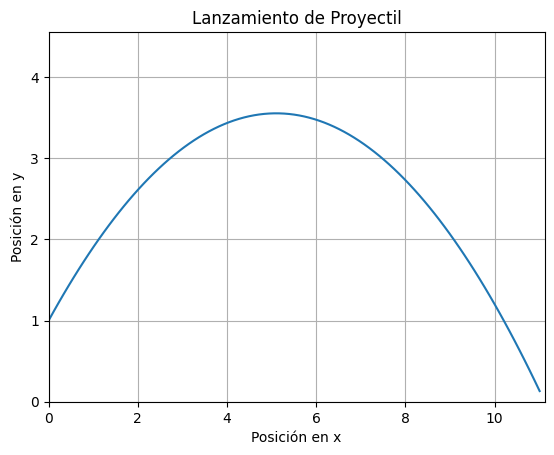

In [49]:
theta = parametros['angulo']
v_inicial = parametros['velocidad']
h_inicial = parametros['altura']

t_vuelo = tiempo_de_vuelo(v_inicial, h_inicial, theta)
t = np.linspace(0, t_vuelo, 100)

x_vals = x(t, v_inicial, theta)
y_vals = y(t, h_inicial, v_inicial, theta)

fig, ax = plt.subplots()
line, = ax.plot(x_vals, y_vals)

ax.set_xlim(0, np.max(x_vals))
ax.set_ylim(0, np.max(y_vals) + 1)


ax.set_xlabel('Posición en x')
ax.set_ylabel('Posición en y')

ax.set_title('Lanzamiento de Proyectil')

ax.grid(True)

def update(num, x_vals, y_vals):
    line.set_data(x_vals[:num], y_vals[:num])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(t), fargs=(x_vals, y_vals), interval=100, blit=True)
ani.save('proyectil.gif', writer='ffmpeg', fps=30)
plt.show()

In [50]:
posicion_tiempo = pd.DataFrame({'Tiempo': np.round(t, 2), 'Posición en x': np.round(x_vals, 2), 'Posición en y': np.round(y_vals, 2)})
posicion_tiempo.to_csv('posicion_tiempo.csv', index=False)

resultados_lanzamiento = pd.DataFrame({'Tiempo de vuelo': [np.round(t_vuelo, 2)], 'Alcance': [np.round(alcance(v_inicial, h_inicial, theta), 2)], 'Altura máxima': [np.round(altura_max(v_inicial, h_inicial, theta), 2)]})
resultados_lanzamiento.to_csv('resultados_lanzamiento.csv', index=False)

In [59]:
calculos_latex = r"""
\documentclass{article}
\usepackage[utf8]{inputenc}
\usepackage{amsmath}
\usepackage{geometry}
\usepackage{setspace}

\geometry{
    a4paper,
    left=2.54cm,
    right=2.54cm,
    top=2.54cm,
    bottom=2.54cm
}

\doublespacing
\begin{document}
\section{Cálculos}
\subsection{Tiempo de vuelo}
\[
T = \frac{v \sin(\theta) + \sqrt{(v \sin(\theta))^2 + 2gh}}{g}
\]
\[
T = \frac{""" + str(v_inicial) + r""" \cdot \sin(""" + str(theta) + r""") + \sqrt{(""" + str(v_inicial) + r""" \cdot \sin(""" + str(theta) + r"""))^2 + 2 \cdot 9.8 \cdot """ + str(h_inicial) + r"""}}{9.8}
\]
\[
T = """ + str(np.round(t_vuelo, 2)) + r"""
\]
\subsection{Alcance}
\[
R = v \cos(\theta) \cdot t
\]
\[
R = """ + str(v_inicial) + r""" \cdot \cos(""" + str(theta) + r""") \cdot """ + str(np.round(t_vuelo, 2)) + r"""
\]
\[
R = """ + str(np.round(alcance(v_inicial, h_inicial, theta), 2)) + r"""
\]
\subsection{Altura máxima}
\[
h_{\text{max}} = h + \frac{v^2 \sin^2(\theta)}{2g}
\]
\[
h_{\text{max}} = """ + str(h_inicial) + r""" + \frac{""" + str(v_inicial) + r"""^2 \cdot \sin^2(""" + str(theta) + r""")}{2 \cdot 9.8}
\]
\[
h_{\text{max}} = """ + str(np.round(altura_max(v_inicial, h_inicial, theta), 2)) + r"""
\]
\end{document}
"""


with open('calculos_lanzamiento/calculos_lanzamiento.tex', 'w', encoding='utf-8') as file:
    file.write(calculos_latex)
